# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.



# Bussiness Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Install category enconder in case of not avaible on system
Used for binary encoding with high cardinality values.

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Understanding and Prepration

In [2]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [4]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [5]:
#get model description of dataframe
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#cheked any null column exist or not
#house_data.isnull().sum()
df_missing=pd.DataFrame((round(100*(house_data.isnull().sum()/len(house_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00

In [8]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [9]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley','FireplaceQu'])

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
#check Missing values of columns
df_missing=pd.DataFrame((round(100*(house_data.isnull().sum()/len(house_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False)
#house_data.isnull().sum()[house_data.isnull().sum()>0]

missing
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
...               ...
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00

[76 rows x 1 columns]

In [12]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [13]:
#Drop LotFrontage column because more than 90% values are missing or No Alley
#house_data=house_data.drop(columns=['LotFrontage'])

In [14]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
#house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [15]:
#check missing values again
df_missing=pd.DataFrame((round(100*(house_data.isnull().sum()/len(house_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False)
#house_data.isnull().sum()[house_data.isnull().sum()>0]

missing
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
...               ...
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00

[76 rows x 1 columns]

In [16]:
#check unique values of LotFrontage
#house_data.LotFrontage.value_counts()

In [17]:
#check median of LotFrontage
#LotFrontage_median = house_data.LotFrontage.median()
#LotFrontage_median

In [18]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [19]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [20]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [21]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [22]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [23]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [24]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [25]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [26]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])   

In [27]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [28]:
print(house_data['GarageYrBlt'].mode())
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data['GarageYrBlt'] = house_data['GarageYrBlt'].replace(np.nan,2005.0)

0    2005.0
dtype: float64


In [29]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [30]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [31]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [32]:
#check missing values again
#house_data.isnull().sum()[house_data.isnull().sum()>0]

#print((round((house_data[null_valumn_columns].isnull().sum()/len(house_data.index.count())*100, 2))
       #, columns=['missing'])
#df_missing.sort_values(by=['missing'], ascending=False)
       
df_missing=pd.DataFrame((round(100*(house_data.isnull().sum()/len(house_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False)

missing
Id                0.0
FullBath          0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
...               ...
MasVnrType        0.0
Exterior2nd       0.0
Exterior1st       0.0
RoofMatl          0.0
SalePrice         0.0

[76 rows x 1 columns]

In [33]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [34]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [35]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [36]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [37]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [38]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [39]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [40]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [41]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [42]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


## Create Dummy Varibales

In [43]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#MSSubClass_df.head()
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3             1             5         216           0        540          756          4       961       756             0       1717             1             0         1         0             3             1            4             7           1     Detchd       1998.0          Unf           3         642           0           35            272          0            0         0     

In [44]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0            0            0            1            0
1            0            0            1            0
2            0            0            1            0
3            0            0            1            0
4            0            0            1            0

In [45]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3             1             5         216           0        540          756          4       961       756             0       1717             1             0         1         

In [46]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [47]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3           

In [48]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [49]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [50]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [51]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [52]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [53]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [54]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [55]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [56]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [57]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [58]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [59]:
house_data.shape

(1460, 161)

In [60]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [61]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 148 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(38), uint8(107)
memory usage: 620.3 KB


## Prepairing Data For Modeling

In [62]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 148)
(439, 148)


In [63]:
df_train.describe()

LotFrontage        LotArea  OverallQual  OverallCond  YearRemodAdd   MasVnrArea    ExterQual     BsmtQual  BsmtExposure  BsmtFinType1   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice     HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
count  1021.000000    1021.000000  1021.000000  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000    1021.000000  1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000     1021.000000     1021.000000     1021.000000     1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000        1021.000000    1021.000000    1021.000000       1021.000000           1021.000000          1021.000000           1021.000000   
mean     69.569050   10489.964740     6.093046     5.580803   1984.984329   104.489716     3.399608     3.479922      1.691479      3.593536   448.165524    50.087169   563.745348  1061.998041     4.150833  1168.611166   343.540646      5.999021  1518.150833      0.439765      0.059745     1.567091     0.377081      2.856024      1.053869     3.511263      6.504407     0.598433  1980.250735     1.771792   471.995103    92.641528    47.035260      23.241920     3.940255    14.047013     2.149853     48.711068     6.288932  180609.596474    36.497551       0.041136       0.002938       0.010774       0.100881       0.196866       0.041136       0.009794       0.042116       0.014691       0.041136        0.064643        0.045054        0.005877        0.024486     0.044074     0.012733     0.785504     0.150833      0.030362      0.008815      0.633692           0.064643       0.030362       0.002938          0.710088              0.000979             0.011753              0.038198   
std      22.090553   10308.062725     1.399636     1.092121     20.604962   187.341089     0.571342     0.900348      1.058956      2.114914   465.115135   170.847470   448.739203   459.098042     0.974565   397.896911   435.498994     48.207914   531.849898      0.525381      0.241230     0.551872     0.500807      0.819993      0.230169     0.659114      1.605514     0.645769    24.694363     0.746119   212.213075   124.479090    66.195468      63.167621    32.333667    51.081766    34.524133    578.364428     2.748576   79099.444132    30.346064       0.198702       0.054153       0.103287       0.301319       0.397825       0.198702       0.098529       0.200951       0.120374       0.198702        0.246014        0.207524        0.076471        0.154627     0.205361     0.112173     0.410673     0.358061      0.171666      0.093519      0.482031           0.246014       0.171666       0.054153          0.453944              0.031296             0.107826              0.191768   
min      21.000

## Rescalling The Numeric Factors

In [64]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
318      0.925326 -0.057261     0.648310    -0.532073      0.389207    0.809137   1.051361  0.577925      2.181065      1.138412    1.159065   -0.293313  -0.454262     0.621091   0.871757  0.511410  2.137583     -0.124502   2.121655      1.066863     -0.247791  0.784821  1.244440      1.395790     -0.234155     0.741868      1.555150    0.622148     0.516535    1.646935    0.867501    1.988123     0.195951       1.912645  -0.121922    -0.275126 -0.062302 -0.084263 -0.833178     260000 -0.675791              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
239     -0.795709 -0.169753    -0.066511    -1.448170     -1.698692   -0.558025  -0.699764 -0.533302     -0.653302     -0.753845   -0.761831   -0.293313   0.172244    -0.712611  -1.181447 -0.931882  0.793638     -0.124502  -0.058599     -0.837450     -0.247791 -1.028080  1.244440      0.175669     -0.234155    -0.776063      0.308833    0.622148    -1.266121   -1.034916   -1.188045   -0.744598     1.405086      -0.368121  -0.121922    -0.275126 -0.062302 -0.084263 -0.833178     113000  0.939707              0              0              0              1              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
986     -0.478677 -0.502762    -0.066511     2.216221      0.874765   -0.558025  -0.699764 -0.533302     -0.653302     -1.226909   -0.964030   -0.293313  -0.175567    -1.257424  -0.154845 -0.421449  0.667284     -0.124502   0.219811     -0.837450     -0.247791 -1.028080 -0.753316     -1.044452     -0.234155     0.741868     -0.937484   -0.927153    -1.225606   -1.034916   -1.023035    2.422143    -0.710899      -0.368121  -0.121922    -0.275126 -0.062302 -0.084263 -0.105172     117000  1.961757              0              0              0              1              0              0              0              0              0              0               0               0               0               0            0            0            0            1             0             0             1                  0              0              0                 0                     0                    0                     0                     0                     0   
1416    -0.433386  0.082504    -1.496155     0.384025     

In [65]:
df_train.describe()

LotFrontage       LotArea   OverallQual   OverallCond  YearRemodAdd    MasVnrArea     ExterQual      BsmtQual  BsmtExposure  BsmtFinType1    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     HeatingQC      1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Fireplaces   GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  EnclosedPorch     3SsnPorch   ScreenPorch      PoolArea       MiscVal        MoSold      SalePrice      HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03    1021.000000  1.021000e+03    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000     1021.000000     1021.000000     1021.000000     1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000        1021.000000    1021.000000    1021.000000       1021.000000           1021.000000   
mean  -2.370506e-17 -9.108912e-17 -2.217184e-16  1.241797e-16 -8.375061e-16 -9.416779e-17  4.334328e-16  2.710858e-16  1.628907e-16  1.346186e-16 -1.090650e-16  2.084523e-16 -1.870307e-17  1.908366e-16 -4.764934e-16 -2.121766e-17 -1.143932e-16 -2.362350e-17 -6.230733e-17  1.539741e-16  1.427740e-16  2.068212e-16  2.353107e-16 -3.523137e-17  6.416132e-16  2.692372e-16 -2.121494e-16 -4.822565e-16  2.147591e-15  9.797365e-17 -6.403355e-17 -2.805461e-17 -2.587983e-17   1.125446e-17  9.925133e-17 -4.316930e-17 -2.020231e-16 -3.671293e-16  4.878294e-17  180609.596474 -8.144535e-17       0.041136       0.002938       0.010774       0.100881       0.196866       0.041136       0.009794       0.042116       0.014691       0.041136        0.064643        0.045054        0.005877        0.024486     0.044074     0.012733     0.785504     0.150833      0.030362      0.008815      0.633692           0.064643       0.030362       0.002938          0.710088              0.000979   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   79099.444132  1.000490e+00       0.198702       0.054153       0.103287       0.301319       0.397825       0.198702       0.098529       0.200951       0.120374       0.198702        0.246014        0.207524        0.076471        0.154627     0.205361     0.112173     0.410673     0.358061      0.171666      0.093519      0.482031           0.246014       0.171666       0.054153          0.453944              0.031296   
min   -2.199712e+00 -8.747892e-01 -3.640619e+00 -4.196464e+00 -1.698692e+00 -5.5

## Training The Model

In [66]:
#create X_train,y_train 

y_train = df_train.pop('SalePrice')
X_train = df_train
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=147)

##  RFE- Recursive Feature Elimination
### Take Top 35 Features from RFE 

In [67]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 69),
 ('LotArea', False, 62),
 ('OverallQual', True, 1),
 ('OverallCond', False, 63),
 ('YearRemodAdd', False, 90),
 ('MasVnrArea', False, 70),
 ('ExterQual', False, 73),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 38),
 ('BsmtFinType1', False, 71),
 ('BsmtFinSF1', False, 16),
 ('BsmtFinSF2', False, 18),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', False, 13),
 ('HeatingQC', False, 103),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', False, 14),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 88),
 ('FullBath', False, 79),
 ('HalfBath', False, 81),
 ('BedroomAbvGr', False, 75),
 ('KitchenAbvGr', False, 77),
 ('KitchenQual', False, 52),
 ('TotRmsAbvGrd', False, 76),
 ('Fireplaces', False, 80),
 ('GarageYrBlt', False, 108),
 ('GarageCars', False, 33),
 ('GarageArea', False, 91),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 97),
 ('EnclosedPorch', False, 100),
 ('3SsnPorch', False, 83),
 ('ScreenPorch',

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_Slab'], dtype='object')

In [70]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=112)

## Building model using statsmodel, for the detailed statistics

In [71]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [72]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [74]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:58:57   Log-Likelihood:                -12092.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     985   BIC:                         2.443e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.421e+05   1.36e+04     10.423      0.000    1.15e+05    1.69e+05
OverallQual           2.487e+04   1865.959     13.328      0.000    2.12e+04    2.85e+04
BsmtQual              1.549e+04   1727.577      8.966      0.000    1.21e+04    1.89e+04
1stFlrSF              2.534e+04   1580.918     16.027      0.000    2.22e+04    2.84e+04
2ndFlrSF              2.427e+04   1939.883     12.512      0.000    2.05e+04    2.81e+04
MSSubClass_75          2.15e+04    2.1e+04      1.021      0.307   -1.98e+04    6.28e+04
MSSubClass_90        -1.992e+04   6003.287     -3.318      0.001   -3.17e+04   -8139.925
MSSubClass_120       -2.389e+04   5078.300     -4.705      0.000   -3.39e+04   -1.39e+04
MSSubClass_160       -3.937e+04   7318.332     -5.380      0.000   -5.37e+04    -2.5e+04
MSZoning_FV           2.067e+04   1.73e+04      1.197      0.231   -1.32e+04    5.45e+04
MSZoning_RH           2.009e+04   1.65e+04      1.221      0.223   -1.22e+04    5.24e+04
MSZoning_RL           2.589e+04   1.36e+04      1.906      0.057    -759.153    5.25e+04
MSZoning_RM            1.63e+04   1.37e+04      1.186      0.236   -1.07e+04    4.33e+04
LotShape_IR3         -2.275e+04   1.17e+04     -1.941      0.053   -4.57e+04     252.757
LotConfig_CulDSac       1.4e+04   4543.373      3.082      0.002    5088.384    2.29e+04
Neighborhood_BrDale    1.96e+04   1.24e+04      1.575      0.116   -4825.333     4.4e+04
Neighborhood_ClearCr  2.865e+04   7922.644      3.616      0.000    1.31e+04    4.42e+04
Neighborhood_Crawfor   2.81e+04   6430.851      4.370      0.000    1.55e+04    4.07e+04
Neighborhood_NoRidge  5.994e+04   6727.024      8.910      0.000    4.67e+04    7.31e+04
Neighborhood_NridgHt  5.519e+04   5428.389     10.166      0.000    4.45e+04    6.58e+04
Neighborhood_Somerst  2.973e+04   9332.743      3.185      0.001    1.14e+04     4.8e+04
Neighborhood_StoneBr  3.661e+04   1.03e+04      3.539      0.000    1.63e+04    5.69e+04
HouseStyle_1Story     1.614e+04   3789.288      4.259      0.000    8702.418    2.36e+04
HouseStyle_2.5Fin    -3.817e+04   2.07e+04     -1.842      0.066   -7.88e+04    2489.719
HouseStyle_2.5Unf    -4.308e+04   2.25e+04     -1.915      0.056   -8.72e+04    1056.760
Exterior1st_BrkComm  -7.177e+04   3.25e+04     -2.211      0.027   -1.35e+05   -8056.883
Exterior1st_CemntBd   -2.92e+04   2.45e+04     -1.192      0.234   -7.73e+04    1.89e+04
Exterior1st_ImStucc  -6.936e+04   3.72e+04     -1.865      0.062   -1.42e+05    3613.037
Exterior1st_Stone    -3.245e+04   2.72e+04     -1.193      0.233   -8.58e+04    2.09e+04
Exterior2nd_Brk Cmn   3.259e+04   2.11e+04      1.544      0.123   -8818.061     7.4e+04
Exterior2nd_BrkFace   2.758e+04   8841.453      3.119      0.002    1.02e+04    4.49e+04
Exterior2nd_CmentBd   3.876e+04   2.45e+04      1.579    

In [75]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
0                  const  161.52
11           MSZoning_RL   27.03
12           MSZoning_RM   21.05
31   Exterior2nd_CmentBd   18.30
26   Exterior1st_CemntBd   18.23
9            MSZoning_FV   10.92
20  Neighborhood_Somerst    4.19
5          MSSubClass_75    3.74
24     HouseStyle_2.5Unf    3.42
4               2ndFlrSF    3.27
22     HouseStyle_1Story    3.12
1            OverallQual    3.03
10           MSZoning_RH    2.96
2               BsmtQual    2.60
3               1stFlrSF    2.17
8         MSSubClass_160    2.00
29   Exterior2nd_Brk Cmn    1.89
25   Exterior1st_BrkComm    1.79
35       Foundation_Slab    1.62
15   Neighborhood_BrDale    1.57
23     HouseStyle_2.5Fin    1.46
19  Neighborhood_NridgHt    1.40
7         MSSubClass_120    1.36
18  Neighborhood_NoRidge    1.30
33     Exterior2nd_Stone    1.28
28     Exterior1st_Stone    1.26
6          MSSubClass_90    1.24
32   Exterior2nd_ImStucc    1.18
27   Exterior1st_ImStucc    1.18
21  Neighborhood_StoneBr    1.17
34    Exterior2nd_Stucco    1.10
14     LotConfig_CulDSac    1.09
17  Neighborhood_Crawfor    1.09
16  Neighborhood_ClearCr    1.05
30   Exterior2nd_BrkFace    1.05
13          LotShape_IR3    1.04

In [76]:
# MSZoning_RL has higher VIF value. Lets drop it.

X_train_new = X_train_rfe.drop(['MSZoning_RL'],axis=1)

In [77]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_Slab'], dtype='object')

In [78]:
#check VIF of RFE Model
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
30   Exterior2nd_CmentBd  18.30
25   Exterior1st_CemntBd  18.23
0                  const   5.00
9            MSZoning_FV   4.27
19  Neighborhood_Somerst   4.19
5          MSSubClass_75   3.59
4               2ndFlrSF   3.27
23     HouseStyle_2.5Unf   3.22
21     HouseStyle_1Story   3.12
1            OverallQual   2.98
2               BsmtQual   2.59
3               1stFlrSF   2.17
8         MSSubClass_160   2.00
28   Exterior2nd_Brk Cmn   1.89
24   Exterior1st_BrkComm   1.79
34       Foundation_Slab   1.62
14   Neighborhood_BrDale   1.57
22     HouseStyle_2.5Fin   1.44
18  Neighborhood_NridgHt   1.39
7         MSSubClass_120   1.36
11           MSZoning_RM   1.34
17  Neighborhood_NoRidge   1.30
32     Exterior2nd_Stone   1.28
27     Exterior1st_Stone   1.26
6          MSSubClass_90   1.23
31   Exterior2nd_ImStucc   1.18
26   Exterior1st_ImStucc   1.18
20  Neighborhood_StoneBr   1.17
33    Exterior2nd_Stucco   1.10
16  Neighborhood_Crawfor   1.09
13     LotConfig_CulDSac   1.09
29   Exterior2nd_BrkFace   1.05
15  Neighborhood_ClearCr   1.05
10           MSZoning_RH   1.05
12          LotShape_IR3   1.04

In [79]:
# Rebuild the model without MSZoning_RL

X_train_lm = sm.add_constant(X_train_new)

In [80]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [81]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     130.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:37   Log-Likelihood:                -12093.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     986   BIC:                         2.443e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.676e+05   2401.182     69.811      0.000    1.63e+05    1.72e+05
OverallQual           2.531e+04   1853.948     13.652      0.000    2.17e+04    2.89e+04
BsmtQual              1.544e+04   1729.661      8.924      0.000     1.2e+04    1.88e+04
1stFlrSF              2.532e+04   1582.995     15.993      0.000    2.22e+04    2.84e+04
2ndFlrSF              2.424e+04   1942.418     12.482      0.000    2.04e+04    2.81e+04
MSSubClass_75         2.937e+04   2.07e+04      1.421      0.156   -1.12e+04    6.99e+04
MSSubClass_90        -1.956e+04   6008.241     -3.255      0.001   -3.13e+04   -7764.998
MSSubClass_120        -2.41e+04   5083.936     -4.740      0.000   -3.41e+04   -1.41e+04
MSSubClass_160       -3.918e+04   7327.449     -5.347      0.000   -5.36e+04   -2.48e+04
MSZoning_FV          -5006.2090   1.08e+04     -0.463      0.643   -2.62e+04    1.62e+04
MSZoning_RH          -5083.5508   9835.145     -0.517      0.605   -2.44e+04    1.42e+04
MSZoning_RM          -9055.5653   3476.403     -2.605      0.009   -1.59e+04   -2233.566
LotShape_IR3          -2.27e+04   1.17e+04     -1.934      0.053   -4.57e+04     329.999
LotConfig_CulDSac     1.415e+04   4548.788      3.111      0.002    5224.235    2.31e+04
Neighborhood_BrDale   1.926e+04   1.25e+04      1.545      0.123   -5199.982    4.37e+04
Neighborhood_ClearCr  2.895e+04   7931.573      3.651      0.000    1.34e+04    4.45e+04
Neighborhood_Crawfor  2.846e+04   6436.651      4.422      0.000    1.58e+04    4.11e+04
Neighborhood_NoRidge  5.969e+04   6734.776      8.863      0.000    4.65e+04    7.29e+04
Neighborhood_NridgHt  5.486e+04   5432.923     10.098      0.000    4.42e+04    6.55e+04
Neighborhood_Somerst  2.943e+04   9343.916      3.150      0.002    1.11e+04    4.78e+04
Neighborhood_StoneBr   3.63e+04   1.04e+04      3.506      0.000     1.6e+04    5.66e+04
HouseStyle_1Story      1.63e+04   3793.352      4.298      0.000    8859.872    2.37e+04
HouseStyle_2.5Fin    -4.198e+04   2.07e+04     -2.032      0.042   -8.25e+04   -1446.620
HouseStyle_2.5Unf     -5.35e+04   2.18e+04     -2.449      0.015   -9.64e+04   -1.06e+04
Exterior1st_BrkComm  -7.135e+04   3.25e+04     -2.195      0.028   -1.35e+05   -7551.354
Exterior1st_CemntBd  -2.874e+04   2.45e+04     -1.172      0.242   -7.69e+04    1.94e+04
Exterior1st_ImStucc  -6.965e+04   3.72e+04     -1.871      0.062   -1.43e+05    3419.598
Exterior1st_Stone    -3.285e+04   2.72e+04     -1.206      0.228   -8.63e+04    2.06e+04
Exterior2nd_Brk Cmn   3.274e+04   2.11e+04      1.549      0.122   -8723.345    7.42e+04
Exterior2nd_BrkFace   2.764e+04   8853.189      3.122      0.002    1.03e+04     4.5e+04
Exterior2nd_CmentBd    3.81e+04   2.46e+04      1.550      0.121   -1.01e+04    8.63e+04
Exterior2nd_ImStucc   3.475e+04   1.32e+04      2.632    

In [82]:
#Exterior1st_CemntBd has higher VIF & p value. Lets drop it.

X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [83]:
# _Rebuild the model without Exterior1st_CemntBd

X_train_lm = sm.add_constant(X_train_new)

In [84]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [85]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:41   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     987   BIC:                         2.442e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.677e+05   2401.555     69.809      0.000    1.63e+05    1.72e+05
OverallQual           2.544e+04   1851.089     13.743      0.000    2.18e+04    2.91e+04
BsmtQual              1.548e+04   1729.609      8.949      0.000    1.21e+04    1.89e+04
1stFlrSF              2.529e+04   1583.079     15.973      0.000    2.22e+04    2.84e+04
2ndFlrSF              2.419e+04   1942.274     12.456      0.000    2.04e+04     2.8e+04
MSSubClass_75         2.919e+04   2.07e+04      1.413      0.158   -1.14e+04    6.98e+04
MSSubClass_90        -1.945e+04   6008.764     -3.238      0.001   -3.12e+04   -7663.541
MSSubClass_120       -2.421e+04   5083.995     -4.762      0.000   -3.42e+04   -1.42e+04
MSSubClass_160       -3.917e+04   7328.826     -5.345      0.000   -5.36e+04   -2.48e+04
MSZoning_FV          -4861.8127   1.08e+04     -0.450      0.653   -2.61e+04    1.64e+04
MSZoning_RH          -5013.9783   9836.824     -0.510      0.610   -2.43e+04    1.43e+04
MSZoning_RM          -9084.9064   3476.970     -2.613      0.009   -1.59e+04   -2261.804
LotShape_IR3         -2.274e+04   1.17e+04     -1.938      0.053   -4.58e+04     290.124
LotConfig_CulDSac     1.413e+04   4549.626      3.107      0.002    5206.406    2.31e+04
Neighborhood_BrDale   1.914e+04   1.25e+04      1.535      0.125   -5325.559    4.36e+04
Neighborhood_ClearCr  2.899e+04   7932.996      3.655      0.000    1.34e+04    4.46e+04
Neighborhood_Crawfor  2.836e+04   6437.242      4.406      0.000    1.57e+04     4.1e+04
Neighborhood_NoRidge  5.958e+04   6735.337      8.845      0.000    4.64e+04    7.28e+04
Neighborhood_NridgHt  5.461e+04   5429.757     10.057      0.000     4.4e+04    6.53e+04
Neighborhood_Somerst  2.908e+04   9340.904      3.113      0.002    1.08e+04    4.74e+04
Neighborhood_StoneBr  3.596e+04   1.04e+04      3.473      0.001    1.56e+04    5.63e+04
HouseStyle_1Story     1.628e+04   3794.018      4.291      0.000    8835.615    2.37e+04
HouseStyle_2.5Fin    -4.195e+04   2.07e+04     -2.031      0.043   -8.25e+04   -1417.656
HouseStyle_2.5Unf    -5.332e+04   2.19e+04     -2.440      0.015   -9.62e+04   -1.04e+04
Exterior1st_BrkComm  -7.121e+04   3.25e+04     -2.190      0.029   -1.35e+05   -7403.794
Exterior1st_ImStucc  -6.975e+04   3.72e+04     -1.873      0.061   -1.43e+05    3330.182
Exterior1st_Stone    -3.291e+04   2.72e+04     -1.208      0.227   -8.64e+04    2.06e+04
Exterior2nd_Brk Cmn   3.272e+04   2.11e+04      1.549      0.122   -8745.340    7.42e+04
Exterior2nd_BrkFace   2.765e+04   8854.859      3.123      0.002    1.03e+04     4.5e+04
Exterior2nd_CmentBd   1.019e+04   6072.663      1.678      0.094   -1725.431    2.21e+04
Exterior2nd_ImStucc   3.476e+04   1.32e+04      2.632      0.009    8847.498    6.07e+04
Exterior2nd_Stone     4.031e+04   2.25e+04      1.794    

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0                  const  5.00
9            MSZoning_FV  4.27
19  Neighborhood_Somerst  4.18
5          MSSubClass_75  3.59
4               2ndFlrSF  3.27
23     HouseStyle_2.5Unf  3.22
21     HouseStyle_1Story  3.12
1            OverallQual  2.97
2               BsmtQual  2.59
3               1stFlrSF  2.17
8         MSSubClass_160  2.00
27   Exterior2nd_Brk Cmn  1.89
24   Exterior1st_BrkComm  1.79
33       Foundation_Slab  1.62
14   Neighborhood_BrDale  1.56
22     HouseStyle_2.5Fin  1.44
18  Neighborhood_NridgHt  1.39
7         MSSubClass_120  1.35
11           MSZoning_RM  1.34
17  Neighborhood_NoRidge  1.30
31     Exterior2nd_Stone  1.28
26     Exterior1st_Stone  1.26
6          MSSubClass_90  1.23
25   Exterior1st_ImStucc  1.18
30   Exterior2nd_ImStucc  1.18
20  Neighborhood_StoneBr  1.17
29   Exterior2nd_CmentBd  1.12
13     LotConfig_CulDSac  1.09
16  Neighborhood_Crawfor  1.09
32    Exterior2nd_Stucco  1.09
10           MSZoning_RH  1.05
15  Neighborhood_ClearCr  1.05
28   Exterior2nd_BrkFace  1.05
12          LotShape_IR3  1.04

In [87]:
X_train_new = X_train_new.drop(['MSZoning_FV'],axis=1)

In [88]:
# #### Creating model 

X_train_lm = sm.add_constant(X_train_new)

In [89]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [90]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     138.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:51   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     988   BIC:                         2.442e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.676e+05   2399.482     69.856      0.000    1.63e+05    1.72e+05
OverallQual           2.546e+04   1849.955     13.760      0.000    2.18e+04    2.91e+04
BsmtQual              1.547e+04   1728.886      8.950      0.000    1.21e+04    1.89e+04
1stFlrSF              2.533e+04   1579.700     16.034      0.000    2.22e+04    2.84e+04
2ndFlrSF              2.417e+04   1940.706     12.453      0.000    2.04e+04     2.8e+04
MSSubClass_75         2.917e+04   2.07e+04      1.412      0.158   -1.14e+04    6.97e+04
MSSubClass_90        -1.948e+04   6006.041     -3.244      0.001   -3.13e+04   -7695.740
MSSubClass_120        -2.44e+04   5063.740     -4.819      0.000   -3.43e+04   -1.45e+04
MSSubClass_160       -3.995e+04   7116.798     -5.614      0.000   -5.39e+04    -2.6e+04
MSZoning_RH          -4941.4750   9831.530     -0.503      0.615   -2.42e+04    1.44e+04
MSZoning_RM          -8980.1971   3467.759     -2.590      0.010   -1.58e+04   -2175.177
LotShape_IR3         -2.284e+04   1.17e+04     -1.947      0.052   -4.59e+04     185.114
LotConfig_CulDSac     1.433e+04   4526.323      3.167      0.002    5450.651    2.32e+04
Neighborhood_BrDale    1.99e+04   1.23e+04      1.611      0.107   -4332.041    4.41e+04
Neighborhood_ClearCr  2.895e+04   7929.197      3.651      0.000    1.34e+04    4.45e+04
Neighborhood_Crawfor  2.836e+04   6434.642      4.407      0.000    1.57e+04     4.1e+04
Neighborhood_NoRidge  5.954e+04   6732.106      8.844      0.000    4.63e+04    7.27e+04
Neighborhood_NridgHt  5.462e+04   5427.458     10.064      0.000     4.4e+04    6.53e+04
Neighborhood_Somerst  2.565e+04   5397.406      4.753      0.000    1.51e+04    3.62e+04
Neighborhood_StoneBr  3.599e+04   1.03e+04      3.478      0.001    1.57e+04    5.63e+04
HouseStyle_1Story     1.633e+04   3790.718      4.309      0.000    8894.183    2.38e+04
HouseStyle_2.5Fin    -4.196e+04   2.06e+04     -2.032      0.042   -8.25e+04   -1437.725
HouseStyle_2.5Unf     -5.33e+04   2.18e+04     -2.440      0.015   -9.62e+04   -1.04e+04
Exterior1st_BrkComm  -7.208e+04   3.24e+04     -2.222      0.027   -1.36e+05   -8417.889
Exterior1st_ImStucc  -6.985e+04   3.72e+04     -1.876      0.061   -1.43e+05    3203.364
Exterior1st_Stone    -3.311e+04   2.72e+04     -1.216      0.224   -8.65e+04    2.03e+04
Exterior2nd_Brk Cmn   3.359e+04    2.1e+04      1.597      0.111   -7692.629    7.49e+04
Exterior2nd_BrkFace   2.759e+04   8850.282      3.117      0.002    1.02e+04     4.5e+04
Exterior2nd_CmentBd   1.034e+04   6061.622      1.705      0.088   -1558.563    2.22e+04
Exterior2nd_ImStucc   3.479e+04   1.32e+04      2.635      0.009    8883.812    6.07e+04
Exterior2nd_Stone     4.036e+04   2.25e+04      1.797      0.073   -3724.551    8.44e+04
Exterior2nd_Stucco   -2.734e+04   8105.968     -3.373    

In [91]:
X_train_new = X_train_new.drop(['MSZoning_RH'],axis=1)

In [92]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     143.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:54   Log-Likelihood:                -12094.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     989   BIC:                         2.441e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.675e+05   2391.497     70.051      0.000    1.63e+05    1.72e+05
OverallQual           2.547e+04   1848.906     13.778      0.000    2.18e+04    2.91e+04
BsmtQual               1.55e+04   1727.265      8.976      0.000    1.21e+04    1.89e+04
1stFlrSF              2.534e+04   1578.941     16.048      0.000    2.22e+04    2.84e+04
2ndFlrSF              2.416e+04   1939.883     12.453      0.000    2.04e+04     2.8e+04
MSSubClass_75         3.009e+04   2.06e+04      1.463      0.144   -1.03e+04    7.05e+04
MSSubClass_90        -1.963e+04   5996.460     -3.274      0.001   -3.14e+04   -7863.489
MSSubClass_120       -2.463e+04   5041.608     -4.886      0.000   -3.45e+04   -1.47e+04
MSSubClass_160       -3.993e+04   7113.952     -5.613      0.000   -5.39e+04    -2.6e+04
MSZoning_RM          -8832.9945   3454.064     -2.557      0.011   -1.56e+04   -2054.859
LotShape_IR3         -2.281e+04   1.17e+04     -1.945      0.052   -4.58e+04     198.455
LotConfig_CulDSac     1.438e+04   4523.573      3.179      0.002    5504.815    2.33e+04
Neighborhood_BrDale   1.985e+04   1.23e+04      1.608      0.108   -4368.814    4.41e+04
Neighborhood_ClearCr  2.903e+04   7924.758      3.663      0.000    1.35e+04    4.46e+04
Neighborhood_Crawfor  2.836e+04   6432.210      4.409      0.000    1.57e+04     4.1e+04
Neighborhood_NoRidge  5.957e+04   6729.342      8.852      0.000    4.64e+04    7.28e+04
Neighborhood_NridgHt  5.467e+04   5424.513     10.079      0.000     4.4e+04    6.53e+04
Neighborhood_Somerst  2.569e+04   5394.810      4.763      0.000    1.51e+04    3.63e+04
Neighborhood_StoneBr  3.611e+04   1.03e+04      3.492      0.001    1.58e+04    5.64e+04
HouseStyle_1Story     1.638e+04   3788.347      4.323      0.000    8941.224    2.38e+04
HouseStyle_2.5Fin    -4.358e+04   2.04e+04     -2.138      0.033   -8.36e+04   -3580.636
HouseStyle_2.5Unf     -5.41e+04   2.18e+04     -2.484      0.013   -9.68e+04   -1.14e+04
Exterior1st_BrkComm  -7.202e+04   3.24e+04     -2.221      0.027   -1.36e+05   -8374.480
Exterior1st_ImStucc  -6.997e+04   3.72e+04     -1.880      0.060   -1.43e+05    3048.477
Exterior1st_Stone    -3.327e+04   2.72e+04     -1.222      0.222   -8.67e+04    2.01e+04
Exterior2nd_Brk Cmn   3.368e+04    2.1e+04      1.602      0.110   -7585.703    7.49e+04
Exterior2nd_BrkFace   2.768e+04   8845.067      3.130      0.002    1.03e+04     4.5e+04
Exterior2nd_CmentBd   1.034e+04   6059.309      1.707      0.088   -1545.781    2.22e+04
Exterior2nd_ImStucc   3.487e+04   1.32e+04      2.643      0.008    8982.363    6.08e+04
Exterior2nd_Stone     4.067e+04   2.24e+04      1.812      0.070   -3382.403    8.47e+04
Exterior2nd_Stucco   -2.757e+04   8089.650     -3.408      0.001   -4.34e+04   -1.17e+04
Foundation_Slab       4.092e+04   1.04e+04      3.944    

In [93]:
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)

In [94]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     147.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:58   Log-Likelihood:                -12095.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     990   BIC:                         2.441e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.674e+05   2389.104     70.060      0.000    1.63e+05    1.72e+05
OverallQual           2.552e+04   1848.927     13.804      0.000    2.19e+04    2.92e+04
BsmtQual              1.547e+04   1727.423      8.953      0.000    1.21e+04    1.89e+04
1stFlrSF              2.504e+04   1560.751     16.046      0.000     2.2e+04    2.81e+04
2ndFlrSF              2.416e+04   1940.366     12.452      0.000    2.04e+04     2.8e+04
MSSubClass_75         2.987e+04   2.06e+04      1.452      0.147   -1.05e+04    7.02e+04
MSSubClass_90        -1.893e+04   5970.164     -3.170      0.002   -3.06e+04   -7210.361
MSSubClass_120       -2.454e+04   5042.318     -4.867      0.000   -3.44e+04   -1.46e+04
MSSubClass_160       -4.018e+04   7112.727     -5.649      0.000   -5.41e+04   -2.62e+04
MSZoning_RM          -8947.9627   3453.644     -2.591      0.010   -1.57e+04   -2170.659
LotShape_IR3         -2.244e+04   1.17e+04     -1.914      0.056   -4.54e+04     570.870
LotConfig_CulDSac      1.45e+04   4523.663      3.205      0.001    5623.064    2.34e+04
Neighborhood_BrDale   1.985e+04   1.23e+04      1.608      0.108   -4370.622    4.41e+04
Neighborhood_ClearCr  2.923e+04   7925.029      3.688      0.000    1.37e+04    4.48e+04
Neighborhood_Crawfor  2.776e+04   6415.356      4.328      0.000    1.52e+04    4.04e+04
Neighborhood_NoRidge  5.991e+04   6725.160      8.908      0.000    4.67e+04    7.31e+04
Neighborhood_NridgHt  5.498e+04   5419.898     10.145      0.000    4.43e+04    6.56e+04
Neighborhood_Somerst  2.578e+04   5395.713      4.777      0.000    1.52e+04    3.64e+04
Neighborhood_StoneBr  3.624e+04   1.03e+04      3.504      0.000    1.59e+04    5.65e+04
HouseStyle_1Story     1.648e+04   3788.373      4.349      0.000    9043.153    2.39e+04
HouseStyle_2.5Fin    -4.306e+04   2.04e+04     -2.112      0.035   -8.31e+04   -3054.834
HouseStyle_2.5Unf    -5.378e+04   2.18e+04     -2.469      0.014   -9.65e+04    -1.1e+04
Exterior1st_BrkComm   -7.23e+04   3.24e+04     -2.229      0.026   -1.36e+05   -8646.043
Exterior1st_ImStucc  -7.005e+04   3.72e+04     -1.882      0.060   -1.43e+05    2988.703
Exterior2nd_Brk Cmn   3.383e+04    2.1e+04      1.608      0.108   -7446.369    7.51e+04
Exterior2nd_BrkFace   2.782e+04   8846.537      3.145      0.002    1.05e+04    4.52e+04
Exterior2nd_CmentBd   1.062e+04   6056.506      1.754      0.080   -1260.894    2.25e+04
Exterior2nd_ImStucc   3.495e+04   1.32e+04      2.648      0.008    9049.377    6.08e+04
Exterior2nd_Stone     2.932e+04   2.04e+04      1.434      0.152   -1.08e+04    6.94e+04
Exterior2nd_Stucco    -2.73e+04   8088.544     -3.375      0.001   -4.32e+04   -1.14e+04
Foundation_Slab       4.118e+04   1.04e+04      3.969      0.000    2.08e+04    6.15e+04
=========================================================

In [95]:
X_train_new.shape

(1021, 31)

In [96]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0                  const  4.95
5          MSSubClass_75  3.56
4               2ndFlrSF  3.27
21     HouseStyle_2.5Unf  3.20
19     HouseStyle_1Story  3.11
1            OverallQual  2.97
2               BsmtQual  2.59
3               1stFlrSF  2.11
8         MSSubClass_160  1.89
24   Exterior2nd_Brk Cmn  1.87
22   Exterior1st_BrkComm  1.79
30       Foundation_Slab  1.62
12   Neighborhood_BrDale  1.54
20     HouseStyle_2.5Fin  1.41
17  Neighborhood_Somerst  1.40
16  Neighborhood_NridgHt  1.39
7         MSSubClass_120  1.33
9            MSZoning_RM  1.33
15  Neighborhood_NoRidge  1.30
6          MSSubClass_90  1.22
23   Exterior1st_ImStucc  1.18
27   Exterior2nd_ImStucc  1.18
18  Neighborhood_StoneBr  1.17
26   Exterior2nd_CmentBd  1.11
29    Exterior2nd_Stucco  1.09
14  Neighborhood_Crawfor  1.08
11     LotConfig_CulDSac  1.07
28     Exterior2nd_Stone  1.06
13  Neighborhood_ClearCr  1.05
25   Exterior2nd_BrkFace  1.05
10          LotShape_IR3  1.04

In [97]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

#Rebuild the model without Exterior2nd_Stone

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:00:02   Log-Likelihood:                -12096.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     991   BIC:                         2.440e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.673e+05   2389.573     70.009      0.000    1.63e+05    1.72e+05
OverallQual           2.555e+04   1849.797     13.814      0.000    2.19e+04    2.92e+04
BsmtQual              1.525e+04   1721.656      8.857      0.000    1.19e+04    1.86e+04
1stFlrSF              2.504e+04   1561.582     16.036      0.000     2.2e+04    2.81e+04
2ndFlrSF              2.417e+04   1941.393     12.449      0.000    2.04e+04     2.8e+04
MSSubClass_75         3.005e+04   2.06e+04      1.460      0.145   -1.03e+04    7.04e+04
MSSubClass_90        -1.786e+04   5926.850     -3.013      0.003   -2.95e+04   -6229.060
MSSubClass_120       -2.453e+04   5045.003     -4.863      0.000   -3.44e+04   -1.46e+04
MSSubClass_160       -4.006e+04   7116.023     -5.630      0.000    -5.4e+04   -2.61e+04
MSZoning_RM          -9053.1608   3454.706     -2.621      0.009   -1.58e+04   -2273.781
LotShape_IR3         -2.226e+04   1.17e+04     -1.897      0.058   -4.53e+04     761.913
LotConfig_CulDSac     1.452e+04   4526.045      3.209      0.001    5642.269    2.34e+04
Neighborhood_BrDale   1.982e+04   1.24e+04      1.605      0.109   -4417.896    4.41e+04
Neighborhood_ClearCr  2.922e+04   7929.254      3.686      0.000    1.37e+04    4.48e+04
Neighborhood_Crawfor  2.872e+04   6383.887      4.499      0.000    1.62e+04    4.12e+04
Neighborhood_NoRidge   6.01e+04   6727.453      8.933      0.000    4.69e+04    7.33e+04
Neighborhood_NridgHt  5.516e+04   5421.455     10.174      0.000    4.45e+04    6.58e+04
Neighborhood_Somerst  2.588e+04   5398.107      4.794      0.000    1.53e+04    3.65e+04
Neighborhood_StoneBr  3.632e+04   1.03e+04      3.509      0.000     1.6e+04    5.66e+04
HouseStyle_1Story     1.667e+04   3788.064      4.400      0.000    9234.242    2.41e+04
HouseStyle_2.5Fin    -4.328e+04   2.04e+04     -2.122      0.034   -8.33e+04   -3256.115
HouseStyle_2.5Unf      -5.4e+04   2.18e+04     -2.478      0.013   -9.68e+04   -1.12e+04
Exterior1st_BrkComm  -7.294e+04   3.25e+04     -2.248      0.025   -1.37e+05   -9255.799
Exterior1st_ImStucc   -7.01e+04   3.72e+04     -1.882      0.060   -1.43e+05    2982.168
Exterior2nd_Brk Cmn   3.375e+04    2.1e+04      1.604      0.109   -7539.561     7.5e+04
Exterior2nd_BrkFace   2.748e+04   8847.983      3.105      0.002    1.01e+04    4.48e+04
Exterior2nd_CmentBd   1.064e+04   6059.719      1.757      0.079   -1247.031    2.25e+04
Exterior2nd_ImStucc   3.479e+04   1.32e+04      2.635      0.009    8884.897    6.07e+04
Exterior2nd_Stucco   -2.764e+04   8089.359     -3.417      0.001   -4.35e+04   -1.18e+04
Foundation_Slab       4.154e+04   1.04e+04      4.002      0.000    2.12e+04    6.19e+04
==============================================================================
Omnibus:                      256.531   Durbin-Watson:             

In [98]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0                  const  4.95
5          MSSubClass_75  3.56
4               2ndFlrSF  3.27
21     HouseStyle_2.5Unf  3.20
19     HouseStyle_1Story  3.11
1            OverallQual  2.97
2               BsmtQual  2.57
3               1stFlrSF  2.11
8         MSSubClass_160  1.89
24   Exterior2nd_Brk Cmn  1.87
22   Exterior1st_BrkComm  1.79
29       Foundation_Slab  1.62
12   Neighborhood_BrDale  1.54
20     HouseStyle_2.5Fin  1.41
17  Neighborhood_Somerst  1.40
16  Neighborhood_NridgHt  1.39
7         MSSubClass_120  1.33
9            MSZoning_RM  1.33
15  Neighborhood_NoRidge  1.30
6          MSSubClass_90  1.20
23   Exterior1st_ImStucc  1.18
18  Neighborhood_StoneBr  1.17
27   Exterior2nd_ImStucc  1.17
26   Exterior2nd_CmentBd  1.11
28    Exterior2nd_Stucco  1.09
11     LotConfig_CulDSac  1.07
14  Neighborhood_Crawfor  1.07
13  Neighborhood_ClearCr  1.05
25   Exterior2nd_BrkFace  1.05
10          LotShape_IR3  1.04

In [99]:
X_train_new = X_train_new.drop(['MSSubClass_75'],axis=1)

#Rebuild the model without BsmtFinSF1

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:00:05   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     992   BIC:                         2.440e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.672e+05   2390.056     69.955      0.000    1.63e+05    1.72e+05
OverallQual           2.572e+04   1847.436     13.920      0.000    2.21e+04    2.93e+04
BsmtQual              1.511e+04   1720.015      8.784      0.000    1.17e+04    1.85e+04
1stFlrSF              2.498e+04   1561.952     15.995      0.000    2.19e+04     2.8e+04
2ndFlrSF              2.428e+04   1941.074     12.507      0.000    2.05e+04    2.81e+04
MSSubClass_90        -1.782e+04   5930.152     -3.004      0.003   -2.95e+04   -6178.733
MSSubClass_120       -2.455e+04   5047.868     -4.863      0.000   -3.45e+04   -1.46e+04
MSSubClass_160       -4.012e+04   7119.972     -5.635      0.000   -5.41e+04   -2.61e+04
MSZoning_RM          -8858.4141   3454.097     -2.565      0.010   -1.56e+04   -2080.237
LotShape_IR3         -2.242e+04   1.17e+04     -1.910      0.056   -4.55e+04     609.178
LotConfig_CulDSac     1.458e+04   4528.468      3.219      0.001    5692.517    2.35e+04
Neighborhood_BrDale   1.951e+04   1.24e+04      1.579      0.115   -4736.116    4.38e+04
Neighborhood_ClearCr  2.927e+04   7933.709      3.689      0.000    1.37e+04    4.48e+04
Neighborhood_Crawfor  2.809e+04   6372.640      4.407      0.000    1.56e+04    4.06e+04
Neighborhood_NoRidge  5.992e+04   6730.229      8.904      0.000    4.67e+04    7.31e+04
Neighborhood_NridgHt  5.508e+04   5424.266     10.154      0.000    4.44e+04    6.57e+04
Neighborhood_Somerst  2.577e+04   5400.693      4.773      0.000    1.52e+04    3.64e+04
Neighborhood_StoneBr  3.609e+04   1.04e+04      3.485      0.001    1.58e+04    5.64e+04
HouseStyle_1Story     1.687e+04   3787.653      4.454      0.000    9438.686    2.43e+04
HouseStyle_2.5Fin    -2.831e+04   1.76e+04     -1.605      0.109   -6.29e+04    6307.916
HouseStyle_2.5Unf    -2.796e+04   1.25e+04     -2.232      0.026   -5.25e+04   -3383.080
Exterior1st_BrkComm   -7.28e+04   3.25e+04     -2.242      0.025   -1.37e+05   -9085.080
Exterior1st_ImStucc  -7.007e+04   3.73e+04     -1.881      0.060   -1.43e+05    3046.702
Exterior2nd_Brk Cmn   3.378e+04   2.11e+04      1.604      0.109   -7535.970    7.51e+04
Exterior2nd_BrkFace   2.749e+04   8853.019      3.106      0.002    1.01e+04    4.49e+04
Exterior2nd_CmentBd   1.112e+04   6054.525      1.836      0.067    -764.500     2.3e+04
Exterior2nd_ImStucc   3.485e+04   1.32e+04      2.638      0.008    8922.047    6.08e+04
Exterior2nd_Stucco   -2.613e+04   8027.775     -3.255      0.001   -4.19e+04   -1.04e+04
Foundation_Slab       4.103e+04   1.04e+04      3.953      0.000    2.07e+04    6.14e+04
==============================================================================
Omnibus:                      256.699   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14388.19

In [100]:
#X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [101]:
##_Rebuild the model without Exterior1stCemntBd

##X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
#lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
#lm.summary()

In [102]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)


In [103]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0            OverallQual  2.95
1               BsmtQual  2.56
3               2ndFlrSF  2.36
17     HouseStyle_1Story  2.36
2               1stFlrSF  2.02
6         MSSubClass_160  1.97
22   Exterior2nd_Brk Cmn  1.87
20   Exterior1st_BrkComm  1.79
27       Foundation_Slab  1.64
10   Neighborhood_BrDale  1.55
15  Neighborhood_Somerst  1.46
14  Neighborhood_NridgHt  1.43
5         MSSubClass_120  1.42
7            MSZoning_RM  1.41
13  Neighborhood_NoRidge  1.33
4          MSSubClass_90  1.24
25   Exterior2nd_ImStucc  1.18
16  Neighborhood_StoneBr  1.18
21   Exterior1st_ImStucc  1.18
24   Exterior2nd_CmentBd  1.15
9      LotConfig_CulDSac  1.11
26    Exterior2nd_Stucco  1.09
12  Neighborhood_Crawfor  1.08
19     HouseStyle_2.5Unf  1.06
23   Exterior2nd_BrkFace  1.06
18     HouseStyle_2.5Fin  1.06
8           LotShape_IR3  1.05
11  Neighborhood_ClearCr  1.05

In [104]:
##_Rebuild the model without HouseStyle2.5Unf

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:00:13   Log-Likelihood:                -12097.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     992   BIC:                         2.440e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.672e+05   2390.056     69.955      0.000    1.63e+05    1.72e+05
OverallQual           2.572e+04   1847.436     13.920      0.000    2.21e+04    2.93e+04
BsmtQual              1.511e+04   1720.015      8.784      0.000    1.17e+04    1.85e+04
1stFlrSF              2.498e+04   1561.952     15.995      0.000    2.19e+04     2.8e+04
2ndFlrSF              2.428e+04   1941.074     12.507      0.000    2.05e+04    2.81e+04
MSSubClass_90        -1.782e+04   5930.152     -3.004      0.003   -2.95e+04   -6178.733
MSSubClass_120       -2.455e+04   5047.868     -4.863      0.000   -3.45e+04   -1.46e+04
MSSubClass_160       -4.012e+04   7119.972     -5.635      0.000   -5.41e+04   -2.61e+04
MSZoning_RM          -8858.4141   3454.097     -2.565      0.010   -1.56e+04   -2080.237
LotShape_IR3         -2.242e+04   1.17e+04     -1.910      0.056   -4.55e+04     609.178
LotConfig_CulDSac     1.458e+04   4528.468      3.219      0.001    5692.517    2.35e+04
Neighborhood_BrDale   1.951e+04   1.24e+04      1.579      0.115   -4736.116    4.38e+04
Neighborhood_ClearCr  2.927e+04   7933.709      3.689      0.000    1.37e+04    4.48e+04
Neighborhood_Crawfor  2.809e+04   6372.640      4.407      0.000    1.56e+04    4.06e+04
Neighborhood_NoRidge  5.992e+04   6730.229      8.904      0.000    4.67e+04    7.31e+04
Neighborhood_NridgHt  5.508e+04   5424.266     10.154      0.000    4.44e+04    6.57e+04
Neighborhood_Somerst  2.577e+04   5400.693      4.773      0.000    1.52e+04    3.64e+04
Neighborhood_StoneBr  3.609e+04   1.04e+04      3.485      0.001    1.58e+04    5.64e+04
HouseStyle_1Story     1.687e+04   3787.653      4.454      0.000    9438.686    2.43e+04
HouseStyle_2.5Fin    -2.831e+04   1.76e+04     -1.605      0.109   -6.29e+04    6307.916
HouseStyle_2.5Unf    -2.796e+04   1.25e+04     -2.232      0.026   -5.25e+04   -3383.080
Exterior1st_BrkComm   -7.28e+04   3.25e+04     -2.242      0.025   -1.37e+05   -9085.080
Exterior1st_ImStucc  -7.007e+04   3.73e+04     -1.881      0.060   -1.43e+05    3046.702
Exterior2nd_Brk Cmn   3.378e+04   2.11e+04      1.604      0.109   -7535.970    7.51e+04
Exterior2nd_BrkFace   2.749e+04   8853.019      3.106      0.002    1.01e+04    4.49e+04
Exterior2nd_CmentBd   1.112e+04   6054.525      1.836      0.067    -764.500     2.3e+04
Exterior2nd_ImStucc   3.485e+04   1.32e+04      2.638      0.008    8922.047    6.08e+04
Exterior2nd_Stucco   -2.613e+04   8027.775     -3.255      0.001   -4.19e+04   -1.04e+04
Foundation_Slab       4.103e+04   1.04e+04      3.953      0.000    2.07e+04    6.14e+04
==============================================================================
Omnibus:                      256.699   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14388.19

In [105]:
#drop the Neighborhood_BrDale
X_train_new = X_train_new.drop(['Neighborhood_BrDale'], axis=1)

##_Rebuild the model without Neighborhood_BrDale

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:00:15   Log-Likelihood:                -12099.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     993   BIC:                         2.439e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.671e+05   2391.600     69.887      0.000    1.62e+05    1.72e+05
OverallQual           2.603e+04   1838.125     14.161      0.000    2.24e+04    2.96e+04
BsmtQual              1.491e+04   1716.537      8.685      0.000    1.15e+04    1.83e+04
1stFlrSF              2.489e+04   1562.097     15.936      0.000    2.18e+04     2.8e+04
2ndFlrSF              2.418e+04   1941.624     12.455      0.000    2.04e+04     2.8e+04
MSSubClass_90        -1.783e+04   5934.603     -3.004      0.003   -2.95e+04   -6184.001
MSSubClass_120       -2.468e+04   5050.995     -4.886      0.000   -3.46e+04   -1.48e+04
MSSubClass_160       -3.428e+04   6087.862     -5.630      0.000   -4.62e+04   -2.23e+04
MSZoning_RM          -8060.9756   3419.549     -2.357      0.019   -1.48e+04   -1350.603
LotShape_IR3         -2.242e+04   1.17e+04     -1.909      0.057   -4.55e+04     628.443
LotConfig_CulDSac     1.479e+04   4529.945      3.264      0.001    5898.147    2.37e+04
Neighborhood_ClearCr  2.922e+04   7939.604      3.680      0.000    1.36e+04    4.48e+04
Neighborhood_Crawfor  2.802e+04   6377.289      4.394      0.000    1.55e+04    4.05e+04
Neighborhood_NoRidge  5.982e+04   6734.992      8.883      0.000    4.66e+04     7.3e+04
Neighborhood_NridgHt   5.46e+04   5419.759     10.073      0.000     4.4e+04    6.52e+04
Neighborhood_Somerst  2.385e+04   5265.905      4.530      0.000    1.35e+04    3.42e+04
Neighborhood_StoneBr  3.529e+04   1.03e+04      3.410      0.001     1.5e+04    5.56e+04
HouseStyle_1Story       1.7e+04   3789.619      4.486      0.000    9563.739    2.44e+04
HouseStyle_2.5Fin    -2.823e+04   1.77e+04     -1.599      0.110   -6.29e+04    6411.001
HouseStyle_2.5Unf    -2.862e+04   1.25e+04     -2.285      0.023   -5.32e+04   -4038.317
Exterior1st_BrkComm  -6.684e+04   3.23e+04     -2.071      0.039    -1.3e+05   -3506.362
Exterior1st_ImStucc  -7.223e+04   3.73e+04     -1.938      0.053   -1.45e+05     896.473
Exterior2nd_Brk Cmn   2.796e+04   2.07e+04      1.348      0.178   -1.27e+04    6.87e+04
Exterior2nd_BrkFace   2.734e+04   8859.154      3.086      0.002    9956.812    4.47e+04
Exterior2nd_CmentBd   1.154e+04   6053.005      1.907      0.057    -333.613    2.34e+04
Exterior2nd_ImStucc   3.675e+04   1.32e+04      2.791      0.005    1.09e+04    6.26e+04
Exterior2nd_Stucco   -2.634e+04   8032.710     -3.279      0.001   -4.21e+04   -1.06e+04
Foundation_Slab       4.047e+04   1.04e+04      3.898      0.000    2.01e+04    6.08e+04
==============================================================================
Omnibus:                      255.719   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14134.204
Skew:                          -0.004   Prob(JB):                         0.00
Kurtosis

In [106]:
#drop the HouseStyle_2.5Fin
X_train_new = X_train_new.drop(['HouseStyle_2.5Fin'], axis=1)

##_Rebuild the model without HouseStyle_2.5Fin

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:00:17   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     994   BIC:                         2.439e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.672e+05   2393.463     69.837      0.000    1.62e+05    1.72e+05
OverallQual           2.632e+04   1830.685     14.376      0.000    2.27e+04    2.99e+04
BsmtQual              1.487e+04   1717.762      8.659      0.000    1.15e+04    1.82e+04
1stFlrSF              2.464e+04   1555.323     15.843      0.000    2.16e+04    2.77e+04
2ndFlrSF              2.369e+04   1918.387     12.348      0.000    1.99e+04    2.75e+04
MSSubClass_90        -1.747e+04   5935.091     -2.944      0.003   -2.91e+04   -5827.914
MSSubClass_120       -2.482e+04   5054.184     -4.910      0.000   -3.47e+04   -1.49e+04
MSSubClass_160       -3.417e+04   6092.262     -5.609      0.000   -4.61e+04   -2.22e+04
MSZoning_RM          -8170.6222   3421.539     -2.388      0.017   -1.49e+04   -1456.353
LotShape_IR3         -2.205e+04   1.18e+04     -1.876      0.061   -4.51e+04    1015.421
LotConfig_CulDSac     1.486e+04   4533.267      3.278      0.001    5963.898    2.38e+04
Neighborhood_ClearCr  2.946e+04   7944.352      3.709      0.000    1.39e+04    4.51e+04
Neighborhood_Crawfor  2.739e+04   6370.188      4.300      0.000    1.49e+04    3.99e+04
Neighborhood_NoRidge  6.047e+04   6728.233      8.987      0.000    4.73e+04    7.37e+04
Neighborhood_NridgHt  5.465e+04   5423.901     10.075      0.000     4.4e+04    6.53e+04
Neighborhood_Somerst  2.386e+04   5270.026      4.528      0.000    1.35e+04    3.42e+04
Neighborhood_StoneBr  3.539e+04   1.04e+04      3.417      0.001    1.51e+04    5.57e+04
HouseStyle_1Story     1.673e+04   3788.863      4.416      0.000    9296.724    2.42e+04
HouseStyle_2.5Unf     -2.81e+04   1.25e+04     -2.242      0.025   -5.27e+04   -3504.835
Exterior1st_BrkComm  -6.668e+04   3.23e+04     -2.064      0.039    -1.3e+05   -3295.302
Exterior1st_ImStucc  -7.313e+04   3.73e+04     -1.961      0.050   -1.46e+05      39.470
Exterior2nd_Brk Cmn   2.794e+04   2.08e+04      1.346      0.179   -1.28e+04    6.87e+04
Exterior2nd_BrkFace   2.732e+04   8866.081      3.081      0.002    9921.014    4.47e+04
Exterior2nd_CmentBd   1.097e+04   6047.099      1.814      0.070    -895.655    2.28e+04
Exterior2nd_ImStucc   3.679e+04   1.32e+04      2.792      0.005    1.09e+04    6.26e+04
Exterior2nd_Stucco   -2.573e+04   8029.781     -3.204      0.001   -4.15e+04   -9968.885
Foundation_Slab       4.057e+04   1.04e+04      3.905      0.000    2.02e+04     6.1e+04
==============================================================================
Omnibus:                      254.541   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13781.529
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                      20.999   Cond. No.                         49.3
==================

In [107]:
#drop theExterior2nd_Brk Cmn
X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'], axis=1)

##_Rebuild the model without Exterior2nd_Brk Cmn

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:00:19   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     995   BIC:                         2.438e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.673e+05   2390.763     69.991      0.000    1.63e+05    1.72e+05
OverallQual           2.635e+04   1831.295     14.388      0.000    2.28e+04    2.99e+04
BsmtQual              1.484e+04   1718.254      8.636      0.000    1.15e+04    1.82e+04
1stFlrSF              2.469e+04   1555.521     15.873      0.000    2.16e+04    2.77e+04
2ndFlrSF              2.366e+04   1919.057     12.330      0.000    1.99e+04    2.74e+04
MSSubClass_90        -1.754e+04   5937.329     -2.954      0.003   -2.92e+04   -5885.661
MSSubClass_120       -2.463e+04   5054.319     -4.873      0.000   -3.45e+04   -1.47e+04
MSSubClass_160       -3.191e+04   5858.003     -5.447      0.000   -4.34e+04   -2.04e+04
MSZoning_RM          -8587.1856   3408.896     -2.519      0.012   -1.53e+04   -1897.736
LotShape_IR3         -2.214e+04   1.18e+04     -1.883      0.060   -4.52e+04     928.158
LotConfig_CulDSac     1.482e+04   4535.018      3.268      0.001    5920.858    2.37e+04
Neighborhood_ClearCr  2.933e+04   7946.940      3.690      0.000    1.37e+04    4.49e+04
Neighborhood_Crawfor  2.726e+04   6372.030      4.278      0.000    1.48e+04    3.98e+04
Neighborhood_NoRidge  6.031e+04   6729.952      8.961      0.000    4.71e+04    7.35e+04
Neighborhood_NridgHt  5.433e+04   5421.017     10.023      0.000    4.37e+04     6.5e+04
Neighborhood_Somerst  2.307e+04   5238.902      4.403      0.000    1.28e+04    3.33e+04
Neighborhood_StoneBr  3.497e+04   1.04e+04      3.377      0.001    1.46e+04    5.53e+04
HouseStyle_1Story     1.663e+04   3789.614      4.388      0.000    9191.009    2.41e+04
HouseStyle_2.5Unf    -2.791e+04   1.25e+04     -2.227      0.026   -5.25e+04   -3312.378
Exterior1st_BrkComm  -3.881e+04   2.48e+04     -1.565      0.118   -8.75e+04    9849.930
Exterior1st_ImStucc  -7.276e+04   3.73e+04     -1.950      0.051   -1.46e+05     442.815
Exterior2nd_BrkFace   2.718e+04   8869.101      3.065      0.002    9777.303    4.46e+04
Exterior2nd_CmentBd   1.089e+04   6049.264      1.800      0.072    -980.700    2.28e+04
Exterior2nd_ImStucc    3.64e+04   1.32e+04      2.762      0.006    1.05e+04    6.23e+04
Exterior2nd_Stucco    -2.57e+04   8033.025     -3.199      0.001   -4.15e+04   -9934.413
Foundation_Slab       4.047e+04   1.04e+04      3.894      0.000    2.01e+04    6.09e+04
==============================================================================
Omnibus:                      254.472   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13779.009
Skew:                           0.030   Prob(JB):                         0.00
Kurtosis:                      20.997   Cond. No.                         49.3
==============================================================================

Notes:
[1] Standard Errors 

In [109]:
#drop the HouseStyle_2.5Fin
#X_train_new = X_train_new.drop(['HouseStyle_2.5Fin'], axis=1)

##_Rebuild the model without HouseStyle_2.5Fin

#X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
#lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
#lm.summary()

In [110]:


#drop theExterior2nd_Brk Cmn
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'], axis=1)

##_Rebuild the model without MSSubClass_75

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:01:43   Log-Likelihood:                -12102.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     996   BIC:                         2.438e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.673e+05   2392.496     69.936      0.000    1.63e+05    1.72e+05
OverallQual           2.647e+04   1830.912     14.459      0.000    2.29e+04    3.01e+04
BsmtQual              1.483e+04   1719.492      8.624      0.000    1.15e+04    1.82e+04
1stFlrSF              2.466e+04   1556.527     15.843      0.000    2.16e+04    2.77e+04
2ndFlrSF              2.363e+04   1920.340     12.304      0.000    1.99e+04    2.74e+04
MSSubClass_90        -1.686e+04   5926.050     -2.846      0.005   -2.85e+04   -5234.903
MSSubClass_120       -2.459e+04   5057.927     -4.861      0.000   -3.45e+04   -1.47e+04
MSSubClass_160       -3.196e+04   5862.162     -5.452      0.000   -4.35e+04   -2.05e+04
MSZoning_RM          -8486.7164   3410.771     -2.488      0.013   -1.52e+04   -1793.596
LotShape_IR3         -2.212e+04   1.18e+04     -1.880      0.060   -4.52e+04     971.000
LotConfig_CulDSac      1.49e+04   4538.007      3.284      0.001    5997.907    2.38e+04
Neighborhood_ClearCr  2.942e+04   7952.467      3.700      0.000    1.38e+04     4.5e+04
Neighborhood_Crawfor  2.726e+04   6376.665      4.275      0.000    1.47e+04    3.98e+04
Neighborhood_NoRidge  6.024e+04   6734.691      8.944      0.000     4.7e+04    7.35e+04
Neighborhood_NridgHt  5.429e+04   5424.894     10.008      0.000    4.36e+04    6.49e+04
Neighborhood_Somerst  2.305e+04   5242.705      4.397      0.000    1.28e+04    3.33e+04
Neighborhood_StoneBr   3.49e+04   1.04e+04      3.367      0.001    1.46e+04    5.52e+04
HouseStyle_1Story     1.647e+04   3791.089      4.345      0.000    9033.947    2.39e+04
HouseStyle_2.5Unf    -2.801e+04   1.25e+04     -2.232      0.026   -5.26e+04   -3387.195
Exterior1st_ImStucc  -7.264e+04   3.73e+04     -1.946      0.052   -1.46e+05     616.705
Exterior2nd_BrkFace   2.737e+04   8874.730      3.084      0.002    9955.251    4.48e+04
Exterior2nd_CmentBd    1.09e+04   6053.660      1.801      0.072    -977.596    2.28e+04
Exterior2nd_ImStucc   3.636e+04   1.32e+04      2.757      0.006    1.05e+04    6.22e+04
Exterior2nd_Stucco   -2.556e+04   8038.356     -3.179      0.002   -4.13e+04   -9781.888
Foundation_Slab       3.814e+04   1.03e+04      3.706      0.000    1.79e+04    5.83e+04
==============================================================================
Omnibus:                      253.968   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13683.889
Skew:                           0.014   Prob(JB):                         0.00
Kurtosis:                      20.935   Cond. No.                         49.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
1.No of columns : 12 in Final model after RFE and manual Elimenation
    
2.All columns VIF is < 5

3.All columns have p-value < 0.05 which is our requirment

SyntaxError: invalid syntax (Temp/ipykernel_8284/4288816012.py, line 1)

### Residual analysis of Train Data

Text(0.5, 0, 'Errors')

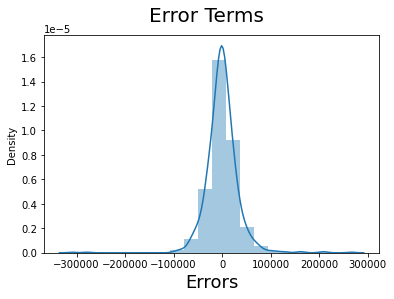

In [112]:
y_train_cnst = lm.predict(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [113]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

In [114]:
## Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1180578144272.5725
1156295929.7478673
34004.35162957628


In [115]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

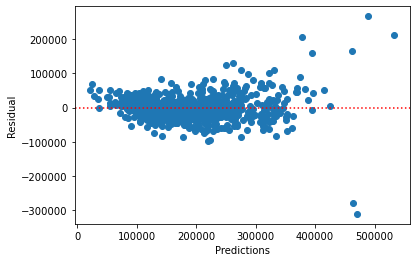

In [116]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

#### Prediction and Evalution on Test Data


In [117]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1436    -0.433386 -0.144614    -1.496155     0.384025     -0.679020   -0.558025  -0.699764 -0.533302     -0.653302      0.665348    0.361022   -0.293313  -0.703973    -0.431488  -1.181447 -0.765928 -0.789230     -0.124502  -1.230557     -0.837450     -0.247791 -1.028080 -0.753316      0.175669     -0.234155    -0.776063     -0.937484   -0.927153    -0.253248    0.306009    0.264038   -0.744598    -0.710899      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263 -0.469175     120500 -0.016404              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0   
57       0.880036  0.112107     0.648310    -0.532073      0.923321   -0.558025   1.051361  0.577925     -0.653302     -1.226909   -0.964030   -0.293313   0.660517    -0.440205   0.871757 -0.775986  1.186484     -0.124502   0.379709     -0.837450     -0.247791  0.784821  1.244440      0.175669     -0.234155     0.741868      0.308833   -0.927153     0.962200    0.306009    0.438477   -0.744598     0.347093      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263  0.622834     196500 -1.137362              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 0                     0                    0                     0                     0                     1   
780     -0.297515 -0.253806     0.648310    -0.532073      0.534875   -0.355087  -0.699764  0.577925     -0.653302     -1.226909   -0.964030   -0.293313   1.501060     0.381373  -0.154845  0.212191 -0.789230     -0.124502  -0.498789     -0.837450     -0.247791  0.784821 -0.753316      0.175669     -0.234155    -0.776063     -0.314326    0.622148     0.597565    0.306009   -0.329996    1.023633    -0.393502      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263 -0.105172     176000 -0.807668              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
382      0.427132 -0.120835     0.648310    -0.532073 

In [118]:
df_test.describe()

LotFrontage     LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea   ExterQual    BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF   HeatingQC    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold      SalePrice    HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
count   439.000000  439.000000   439.000000   439.000000    439.000000  439.000000  439.000000  439.000000    439.000000    439.000000  439.000000  439.000000  439.000000   439.000000  439.000000  439.000000  439.000000    439.000000  439.000000    439.000000    439.000000  439.000000  439.000000    439.000000    439.000000   439.000000    439.000000  439.000000   439.000000  439.000000  439.000000  439.000000   439.000000     439.000000  439.000000   439.000000  439.000000  439.000000  439.000000     439.000000  439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000      439.000000      439.000000      439.000000      439.000000   439.000000   439.000000   439.000000   439.000000    439.000000    439.000000    439.000000         439.000000     439.000000     439.000000        439.000000            439.000000           439.000000            439.000000            439.000000   
mean      0.044381    0.008671     0.014903    -0.016637     -0.019148   -0.024379   -0.021652    0.033702     -0.110963     -0.074960   -0.032377   -0.068902    0.025916    -0.033111   -0.019212   -0.050044    0.026373     -0.010664   -0.016811     -0.091341     -0.030499   -0.012195    0.038505      0.042261     -0.105435     0.001920      0.027773    0.075129    -0.037015   -0.020822    0.015445    0.042849    -0.018849      -0.067836   -0.054609     0.066047    0.058699   -0.030043    0.039931  181645.895216    0.005526       0.061503       0.002278       0.002278       0.093394       0.223235       0.041002       0.013667       0.034169       0.011390       0.022779        0.047836        0.038724        0.009112        0.011390     0.045558     0.006834     0.794989     0.145786      0.022779      0.002278      0.633257           0.063781       0.036446       0.002278          0.744875              0.002278             0.009112              0.043280              0.018223   
std       0.991429    0.891711     0.961406     1.063263      1.008023    0.878475    1.018493    0.909956      0.933225      0.988361    0.935148    0.798998    0.949447     0.844311    0.949066    0.902588    1.009237      1.029982    0.961083      0.956973      0.966692    0.995798    1.014870      0.983782      0.846603     1.024904      1.042020    0.993950     1.008594    1.006806    1.026307    1.023814     1.004550       0.887293    0.638820     1.280055    1.477231    0.348993    0.945506   80320.777267    0.991060       0.240526       0.047727       0.047727       0.291316       0.416889       0.198522       0.116239       0.181869       0.106233       0.149369        0.213663        0.193157        0.095127        0.106233     0.208763     0.082477     0.404171     0.353294      0.149369      0.047727      0.482465           0.244642       0.187612       0.047727          0.436429              0.047727             0.095127              0.203719              0.133910   
min      -2.199712   -0.891

In [119]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test


In [120]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Slab'], dtype='object')

In [121]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     96.82
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.28e-151
Time:                        23:03:02   Log-Likelihood:                -5174.1
No. Observations:                 439   AIC:                         1.040e+04
Df Residuals:                     415   BIC:                         1.049e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.71e+05   3857.416     44.341      0.000    1.63e+05    1.79e+05
OverallQual           2.707e+04   2761.900      9.801      0.000    2.16e+04    3.25e+04
BsmtQual              1.355e+04   2789.126      4.857      0.000    8063.732     1.9e+04
1stFlrSF              2.899e+04   2532.002     11.450      0.000     2.4e+04     3.4e+04
2ndFlrSF              2.483e+04   3033.066      8.187      0.000    1.89e+04    3.08e+04
MSSubClass_90        -2.349e+04   1.09e+04     -2.161      0.031   -4.49e+04   -2122.806
MSSubClass_120       -2.764e+04   7968.570     -3.468      0.001   -4.33e+04    -1.2e+04
MSSubClass_160       -2.766e+04   8954.994     -3.089      0.002   -4.53e+04   -1.01e+04
MSZoning_RM          -8620.2077   5075.265     -1.698      0.090   -1.86e+04    1356.223
LotShape_IR3         -3039.2932   3.31e+04     -0.092      0.927   -6.81e+04     6.2e+04
LotConfig_CulDSac     1.708e+04   6575.443      2.598      0.010    4156.309       3e+04
Neighborhood_ClearCr  1.074e+04   1.21e+04      0.890      0.374    -1.3e+04    3.45e+04
Neighborhood_Crawfor  1.487e+04   8091.608      1.838      0.067   -1036.363    3.08e+04
Neighborhood_NoRidge  4.148e+04   1.45e+04      2.860      0.004     1.3e+04       7e+04
Neighborhood_NridgHt  7.109e+04   9061.189      7.846      0.000    5.33e+04    8.89e+04
Neighborhood_Somerst  7245.9034   7326.435      0.989      0.323   -7155.645    2.16e+04
Neighborhood_StoneBr  8.555e+04   1.06e+04      8.095      0.000    6.48e+04    1.06e+05
HouseStyle_1Story     1.083e+04   6098.353      1.775      0.077   -1161.888    2.28e+04
HouseStyle_2.5Unf    -4.197e+04   1.93e+04     -2.173      0.030   -7.99e+04   -3999.236
Exterior1st_ImStucc   -2.43e-11   8.54e-12     -2.844      0.005   -4.11e-11   -7.51e-12
Exterior2nd_BrkFace  -3836.7576   1.13e+04     -0.340      0.734    -2.6e+04    1.83e+04
Exterior2nd_CmentBd   1.573e+04   7604.266      2.069      0.039     782.573    3.07e+04
Exterior2nd_ImStucc   3.331e+04   2.45e+04      1.357      0.176   -1.49e+04    8.16e+04
Exterior2nd_Stucco   -1900.9822   1.38e+04     -0.138      0.890    -2.9e+04    2.52e+04
Foundation_Slab       3.255e+04   1.67e+04      1.951      0.052    -250.227    6.54e+04
==============================================================================
Omnibus:                      109.143   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.333
Skew:                           0.807   Prob(JB):                    9.44e-198
Kurtosis:                       9.856   Cond. No.                     3.57e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

In [122]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### calculate r2 score of Test model

In [123]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)



0.82

In [124]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)




522327436670.09
1189811928.6334624
34493.65055533355


In [125]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0            OverallQual  2.88
1               BsmtQual  2.55
16     HouseStyle_1Story  2.34
3               2ndFlrSF  2.27
2               1stFlrSF  1.99
23       Foundation_Slab  1.61
5         MSSubClass_120  1.42
13  Neighborhood_NridgHt  1.42
7            MSZoning_RM  1.37
14  Neighborhood_Somerst  1.37
6         MSSubClass_160  1.33
12  Neighborhood_NoRidge  1.33
4          MSSubClass_90  1.23
18   Exterior1st_ImStucc  1.18
15  Neighborhood_StoneBr  1.18
21   Exterior2nd_ImStucc  1.17
20   Exterior2nd_CmentBd  1.14
9      LotConfig_CulDSac  1.11
22    Exterior2nd_Stucco  1.09
11  Neighborhood_Crawfor  1.08
17     HouseStyle_2.5Unf  1.06
19   Exterior2nd_BrkFace  1.06
10  Neighborhood_ClearCr  1.05
8           LotShape_IR3  1.05

Text(0, 0.5, 'y_pred')

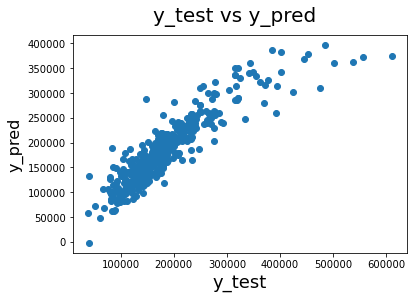

In [126]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [127]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Slab'], dtype='object')

In [128]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Slab']]
final_df.head()

OverallQual  BsmtQual  1stFlrSF  2ndFlrSF  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSZoning_RM  LotShape_IR3  LotConfig_CulDSac  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_StoneBr  HouseStyle_1Story  HouseStyle_2.5Unf  Exterior1st_ImStucc  Exterior2nd_BrkFace  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_Stucco  Foundation_Slab
0            7         4       856       854              0               0               0            0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                    0                    0                   0                0
1            6         4      1262         0              0               0               0            0             0                  0                     0                     0                     0                     0                     0                     0                  1                  0                    0                    0                    0                    0                   0                0
2            7         4       920       866              0               0               0            0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                    0                    0                   0                0
3            7         3       961       756              0               0               0            0             0                  0                     0                     1                     0                     0                     0                     0                  0                  0                    0                    0                    0                    0                   0                0
4            8         4      1145      1053              0               0               0            0             0                  0                     0                     0                     1                     0                     0                     0                  0                  0                    0                    0                    0                    0                   0                0

### Final evalution

In [ ]:
No of Variables = 24 i.e. 'OverallQual', 'BsmtQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Slab'VIF < 5
p-value < 0.05
r2 score for Train Data set model = 0.82
r2 score for Test Data set model = 0.82

In [129]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8150102335149322
0.8151527799923417
1180578144272.5725
522327436670.09
1156295929.7478673
1189811928.6334624


### Ridge Regression 

In [130]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [132]:


#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)



[ 28362.93240039  13692.82400404  25904.12934047  23312.89539893
 -11277.25915217 -15566.11933962 -21937.98274488 -11811.72343522
 -11742.39110059  13851.81141661  18246.02441414  16564.97746052
  42620.60154807  39859.37201659  14393.48491833  13805.88190244
  14625.96518791 -12277.82766626  -3264.74760603  14405.2577902
   9412.0018518   12217.32863955 -16935.26988908  20555.05770774]


In [133]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8086947999951486
0.8080933845662521
1220882334751.4805
542275347800.14185
1195771140.7947898
1235251361.7315304


### Lasso

In [134]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [136]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [137]:
lasso.coef_

array([ 27313.28339938,  14088.32658111,  25190.76699723,  23041.21738617,
       -12332.81419599, -19055.43267922, -26714.08628694, -10075.14679729,
       -11117.30230469,  13856.2050999 ,  24177.76399057,  21453.13851499,
        55424.38523142,  49381.28566897,  18904.28518771,  22414.10271709,
        14873.41080415, -14580.94694583,     -0.        ,  18440.04380587,
         8922.81422698,  13423.47830266, -20217.3934318 ,  28182.89427128])

In [138]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8124419447292204
0.8117918962731697
1196968594761.8242
531824370288.61346
1172349260.2956164
1211445034.8259988


In [139]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.150102e-01      8.086948e-01      8.124419e-01
1   R2 Score (Test)       8.151528e-01      8.080934e-01      8.117919e-01
2       RSS (Train)       1.180578e+12      1.220882e+12      1.196969e+12
3        RSS (Test)       5.223274e+11      5.422753e+11      5.318244e+11
4       MSE (Train)       3.400435e+04      3.457992e+04      3.423959e+04
5        MSE (Test)       3.449365e+04      3.514614e+04      3.480582e+04

### Lets observe the changes in the coefficients after regularization


In [140]:
betas = pd.DataFrame(index=X.columns)


In [141]:
betas.rows = X.columns


In [142]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [143]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge         Lasso
OverallQual           26472.627478  28362.932400  27313.283399
BsmtQual              14828.785366  13692.824004  14088.326581
1stFlrSF              24660.138031  25904.129340  25190.766997
2ndFlrSF              23628.678101  23312.895399  23041.217386
MSSubClass_90        -16863.878716 -11277.259152 -12332.814196
MSSubClass_120       -24588.999741 -15566.119340 -19055.432679
MSSubClass_160       -31960.471484 -21937.982745 -26714.086287
MSZoning_RM           -8486.716383 -11811.723435 -10075.146797
LotShape_IR3         -22117.639332 -11742.391101 -11117.302305
LotConfig_CulDSac     14903.059442  13851.811417  13856.205100
Neighborhood_ClearCr  29424.521006  18246.024414  24177.763991
Neighborhood_Crawfor  27258.389855  16564.977461  21453.138515
Neighborhood_NoRidge  60238.205897  42620.601548  55424.385231
Neighborhood_NridgHt  54290.273365  39859.372017  49381.285669
Neighborhood_Somerst  23053.050005  14393.484918  18904.285188
Neighborhood_StoneBr  34896.224966  13805.881902  22414.102717
HouseStyle_1Story     16473.385841  14625.965188  14873.410804
HouseStyle_2.5Unf    -28005.582590 -12277.827666 -14580.946946
Exterior1st_ImStucc  -72638.267951  -3264.747606     -0.000000
Exterior2nd_BrkFace   27370.565431  14405.257790  18440.043806
Exterior2nd_CmentBd   10901.794875   9412.001852   8922.814227
Exterior2nd_ImStucc   36359.740672  12217.328640  13423.478303
Exterior2nd_Stucco   -25555.944298 -16935.269889 -20217.393432
Foundation_Slab       38144.748253  20555.057708  28182.894271

#### Que1: Double the values of Alpha for lasso & Ridge

In [144]:
# earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 29175.55561906  13460.30553348  26486.99642747  22792.85116164
  -8825.65964253 -11811.430992   -17267.46577797 -12655.42800698
  -8096.8484995   12476.79633842  13160.40437978  11950.06730062
  33780.60238793  32176.26972095  10498.71701841   7977.12373783
  13072.22948692  -7922.63403133  -1189.93262952   9723.95129183
   7697.00059742   7786.46012148 -12684.85171716  14278.84048897]
0.8023586217050721
0.8024868906148278


#  Coeff values are increasing as alpha will increase.r2_score of train data is also drop from .82 to 0.80

In [145]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 28270.62235044  13323.06867307  25608.97971474  22256.4548942
  -7945.38360066 -13860.63361656 -21661.69141098 -11634.76030634
     -0.          12711.06608016  18617.99204007  15791.31579871
  52489.68537906  44555.48784042  14836.33563721  10095.33807117
  13332.82034632   -979.73671852     -0.           9428.44858297
   7017.48354993      0.         -14697.26298542  18347.47815842]
0.806901411482789
0.8039433069612976


# As alpha value increased more feautrues removed from model. But r2_score is also dropped by 0.006 & 0.003 in both test and train data

#### Que3: Drop the Top 5 features and rebuild lasso

##### _Top 5 features are Neighborhood_NoRidge, Neighborhood_NridgHt, 2ndFlrSF, OverallQual, 1stFlrSF

In [146]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF','2ndFlrSF', 'OverallQual'
                               ], axis=1)
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt','1stFlrSF', '2ndFlrSF', 'OverallQual'
                               ], axis=1)
lasso = Lasso()



In [147]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)



{'alpha': 100}


In [149]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 


Lasso(alpha=500)

In [150]:
Lasso(alpha=500)

Lasso(alpha=500)

In [151]:
lasso.coef_

array([ 49329.63644998,     -0.        ,     -0.        , -32698.50829725,
       -34905.02149095,     -0.        ,  14911.77331494,    592.49233187,
        18770.71647632,   4031.28961794,   4042.80849994, -10339.31353903,
            0.        ,      0.        ,  12037.27621042,  13844.73475104,
            0.        ,      0.        ,  97994.29956678])

In [152]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.4410090290554348
0.455334633363761


# After dropping the top 5 features model r2 score is very low i.e. 44% for Train and 45% for Test.

In [153]:
X_train_new.columns

Index(['BsmtQual', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Foundation_Slab'], dtype='object')